In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving phishcoop.csv to phishcoop.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('phishcoop.csv')
dataset = dataset.drop('id',1)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values
y = np.squeeze(y)
y = np.where(y == -1, 0, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)
print(X.shape)

(6992, 30)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.3915 - accuracy: 0.8424
Epoch 2/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.2332 - accuracy: 0.9198
Epoch 3/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.2245 - accuracy: 0.9178
Epoch 4/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.2164 - accuracy: 0.9281
Epoch 5/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.2078 - accuracy: 0.9352
Epoch 6/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.2299 - accuracy: 0.9293
Epoch 7/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.2051 - accuracy: 0.9410
Epoch 8/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.2142 - accuracy: 0.9438
Epoch 9/100
5244/5244 [==============================] - 6s 1ms/step - loss: 0.2247 - accuracy: 0.9400
Epoch 10/100
5244/5244 [==============================] - 6s 1ms/step - l

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

print(metrics.accuracy_score(y_test, y_pred))

0.9496567505720824


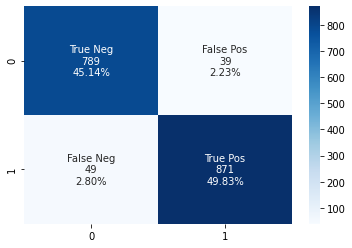

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')